# PyTorch Computer Vision

* See reference notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/03_pytorch_computer_vision.ipynb
* See reference online book - 

## 0. Computer Vision Libraries in Pytorch
* 'torchvision' - base domain library for pytorch computer vision
* 'torchvision.datasets' - get datasets and data loading functions for computer vision
* 'torchvision.models' - get pretrained computer vision models that you can leverage for own problems
* 'torchvision.transforms' - functions for manipulating your vision data (images) to be suitable for use with an ML model
* 'torch.utils.data.Dataset' - Base dataset class for Pytorch
* 'torch.utils.data.DataLoader' - Create a Python iterable over a dataset


In [168]:
# import Pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)


2.3.1
0.18.1


In [169]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## 1. Getting a dataset

The dataset we will be using is FashionMNIST from torchvision.datasets

In [170]:
# Setup Training data
train_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=True,  # do we need the Training datasets?
    download=True, # do we want to download yes/no
    transform= torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels / targets?
)

test_data = datasets.FashionMNIST(
    root="data", # Where to download data to?
    train=False,  # do we need the Training datasets?
    download=True, # do we want to download yes/no
    transform= torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels / targets?
)

In [171]:
len(train_data), len(test_data)

(60000, 10000)

In [172]:
# See the first training example
#print(train_data[0])
image, label = train_data[0]
print(image, label)
print(image.shape) # C x H x W


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [173]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [174]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [175]:
# Counting each number of class elements
from collections import Counter

# Extract labels from the train_data
labels = train_data.targets.numpy()  # Assuming train_data is a PyTorch Dataset

# Count the occurrences of each label (class)
class_counts = Counter(labels)

# Print the number of instances for each class
for class_label, count in class_counts.items():
    print(f"Class {class_label} {class_names[class_label]}: {count} instances")


Class 9 Ankle boot: 6000 instances
Class 0 T-shirt/top: 6000 instances
Class 3 Dress: 6000 instances
Class 2 Pullover: 6000 instances
Class 7 Sneaker: 6000 instances
Class 5 Sandal: 6000 instances
Class 1 Trouser: 6000 instances
Class 6 Shirt: 6000 instances
Class 4 Coat: 6000 instances
Class 8 Bag: 6000 instances


In [176]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Check input shapes of data

In [177]:
# Check the shape of our image
print(f"Image shape: {image.shape} -> [color channels, height, width]")
print(f"Image label: {class_names[label]}")

# Gray scale images have 1 color channel

Image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

torch.Size([1, 28, 28])


TypeError: Invalid shape (1, 28, 28) for image data

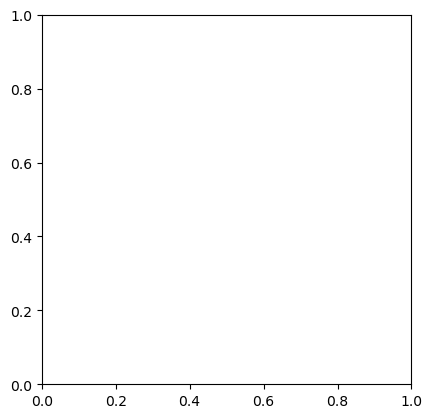

In [179]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(image.shape)
plt.imshow(image)

plt.imshow() expects the color channel to be last like (H * W * C) or it can work without color channels for a gray scale image. so we can use squeeze() to remove an extra dimension

torch.Size([1, 28, 28])


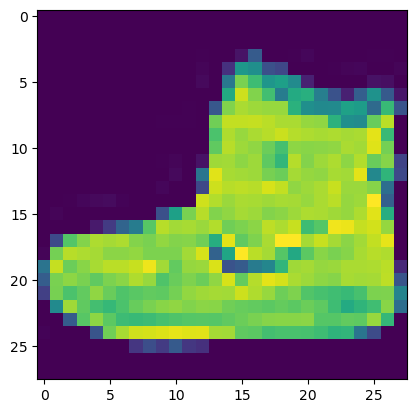

In [180]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze())

(-0.5, 27.5, 27.5, -0.5)

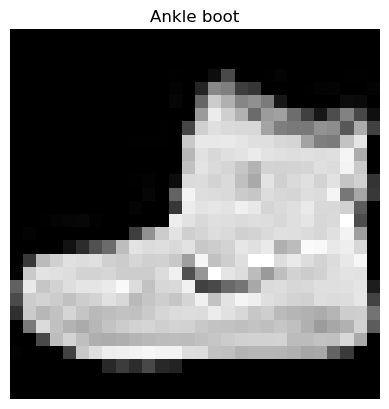

In [181]:
class_names = train_data.classes # gives a list of class names
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

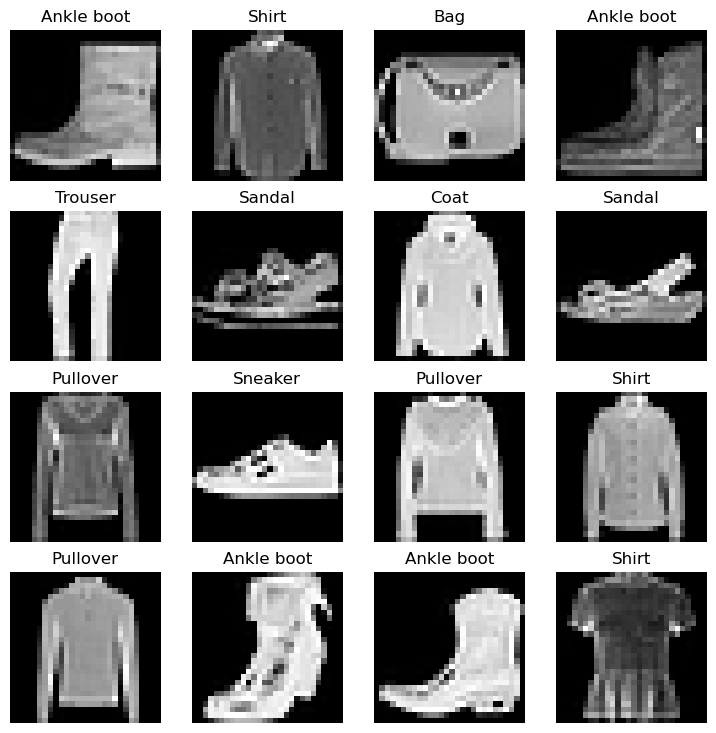

In [182]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    #print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

    


In [183]:
random_id = torch.randint(0, 10, size = [1]).item()
print(type(random_id))
print(random_id)

<class 'int'>
5


In [184]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [185]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets

DataLoader turns our dataset into a Python iterable

More specificaly, we want to turn our data into batches (or mini-batches)

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 imges at a time (batch size of 32).
2. It gives our neural network more chances to update its gradient per epoch


Do you think these items of clothing (images) could be modelled with pure linear lines? or do you think we'll need non-linearities?


In [186]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE =32

# Turn datasets into iterables
train_dataloader = DataLoader(
    dataset=train_data,
    batch_size= BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size= BATCH_SIZE,
    shuffle=False
)

In [187]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fabe9e3b170>,
 <torch.utils.data.dataloader.DataLoader at 0x7fabe9e3ad20>)

In [188]:
# Let's checkout what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} bathes of {BATCH_SIZE}.....")
print(f"Length of test dataloader: {len(test_dataloader)} bathes of {BATCH_SIZE}.....")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fabe9e3b170>, <torch.utils.data.dataloader.DataLoader object at 0x7fabe9e3ad20>)
Length of train dataloader: 1875 bathes of 32.....
Length of test dataloader: 313 bathes of 32.....


In [189]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [190]:
train_features_batch

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.3176,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.2275,  ..., 0.0078, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.1569,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0078, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0157, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [191]:
train_labels_batch

tensor([1, 8, 6, 6, 5, 9, 4, 6, 0, 9, 8, 6, 2, 4, 6, 2, 1, 5, 1, 3, 5, 4, 9, 1,
        1, 2, 8, 7, 0, 3, 6, 0])

Certainly! Here's a simple example using a list to demonstrate how the iter and next functions work together:

In [192]:
# A simple list
my_list = [10, 20, 30, 40, 50]

# Convert the list into an iterator
my_iterator = iter(my_list)

# Use next to get items from the iterator
first_item = next(my_iterator)
print("First item:", first_item)  # Output: 10

second_item = next(my_iterator)
print("Second item:", second_item)  # Output: 20

third_item = next(my_iterator)
print("Third item:", third_item)  # Output: 30


First item: 10
Second item: 20
Third item: 30


Image size: torch.Size([1, 28, 28])
Label 4 Label size: torch.Size([])


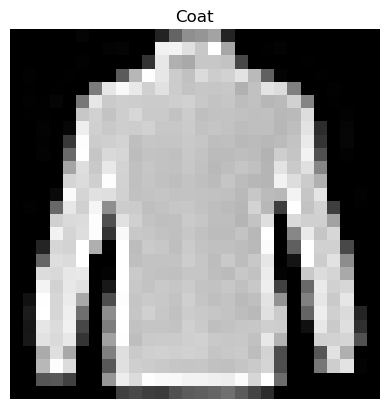

In [193]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label {label} Label size: {label.shape}")

## 3. Model 0: Build a baseline model

When starting to bild a series of machine learning modelling experiments, it's best practice to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models / experiments.

In other words: start simply and add complexity when necessary

In [194]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)  # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color channels, height* width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color channels, height* width]


In [195]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape : int,
                 hidden_units : int,
                 output_shape: int) :
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )


    def forward(self, x):
        return self.layer_stack(x)

In [196]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(input_shape= 784, # this is 28 by 28
                              hidden_units= 10,
                              output_shape=len(class_names)).to(device)

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [197]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [198]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163], device='cuda:0')),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be 'nn.CrossEntropyLoss()'
* Optimizer - Our optimizer 'torch.optim.SGD()' stochastic gradient descent
* Evaluation metric - since we are wotking on a classification problem, let's use accuracy as our evaluation metric


In [199]:
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

## 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values)
2. How fast it runs 

In [200]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Prints differences between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")

    return total_time

In [201]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device=device)

Train time on cuda: 0.000 seconds


4.272535443305969e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculte the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Perform what's happening
5. Time it all (for fun)

In [202]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create a training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)

        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        #2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        #3. Optimizer zero grad
        optimizer.zero_grad()

        #4. Loss Backward
        loss.backward()

        #5. Optimizer step
        optimizer.step()

        # Print out what's happening 
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:

            X_test, y_test = X_test.to(device), y_test.to(device)
            # 1. Forward pass
            test_pred = model_0(X_test)

            #2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            #3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch 
        test_loss /= len(test_dataloader)

        # Calculate the test acc per batch
        test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\nTrain Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end= train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

    







  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Looked at 0/60000 samples


Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:33<01:07, 33.59s/it]


Train Loss: 0.5904 | Test Loss: 0.5095 | Test Accuracy: 82.0387
Epoch: 1
------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [01:06<00:33, 33.21s/it]


Train Loss: 0.4763 | Test Loss: 0.4799 | Test Accuracy: 83.1969
Epoch: 2
------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [01:41<00:00, 33.85s/it]


Train Loss: 0.4550 | Test Loss: 0.4766 | Test Accuracy: 83.4265
Train time on cuda:0: 101.556 seconds


In [203]:
str(next(model_0.parameters()).device)

'cuda:0'

In [204]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 4. Make predictions and get Model 0 results

In [205]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device:torch.device = device):
    """Returns a dictionary containing the results of model predicting on data_loader."""
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            # Make predictions 
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true = y,
                               y_pred = y_pred.argmax(dim=1)) 
        
        # Scale the loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    print(loss, acc)
    return {"model_name": model.__class__.__name__, # only works when model was created inside a clas
            "model_loss": loss.item(),
            "model_acc": acc}


In [206]:
model_0_results = eval_model(model=model_0,
           data_loader=test_dataloader,
           loss_fn=loss_fn,
           accuracy_fn=accuracy_fn,
           device=device)

model_0_results

100%|██████████| 313/313 [00:03<00:00, 96.84it/s] 

tensor(0.4766, device='cuda:0') 83.42651757188499


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766389727592468,
 'model_acc': 83.42651757188499}

## 5. Setup a device agnostic code (for using GPU if there is one)

In [207]:
!nvidia-smi

Thu Aug 29 10:09:22 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.89.02    Driver Version: 525.89.02    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 30%   35C    P2    99W / 350W |  21444MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:1B:00.0 Off |                  N/A |
| 30%   

In [208]:
torch.cuda.is_available()

True

In [209]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Building a better model with non-linearity

We learned about the power of non-linearity in notebook 02 -

In [210]:
# Create a model with non-linear and linear layers
from torch import nn
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape : int,
                 hidden_units : int,
                 output_shape: int) :
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )


    def forward(self, x):
        return self.layer_stack(x)

In [211]:
# Create an instance of model_1
torch.manual_seed(42)
# Setup model with input parameters
model_1 = FashionMNISTModelV1(input_shape= 784, # this is 28 by 28
                              hidden_units= 10,
                              output_shape=len(class_names)).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [212]:
dummy_x = torch.rand([1, 1, 28, 28]).to(device)
model_1(dummy_x)

tensor([[0.0806, 0.1593, 0.1565, 0.0000, 0.4741, 0.1441, 0.1634, 0.3834, 0.0000,
         0.0000]], device='cuda:0', grad_fn=<ReluBackward0>)

In [213]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss function, optimizer and evaluation metrics

In [214]:
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(),  # tries to update our model's parameter's to reduce the loss
                            lr=0.1) 



### 6.2 Functionizing training and testing loops

Let's create a function for:
* training loop - train_step()
* testing_loop - test_step()

In [215]:

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs a training with model trying to learn on dataloader"""
    
    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train()

    # Add a loop to loop through training batches
    for X, y in data_loader:

        # Put data on target device
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model(X)

        #2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred= y_pred.argmax(dim=1))

        #3. Optimizer zero grad
        optimizer.zero_grad()

        #4. Loss Backward
        loss.backward()

        #5. Optimizer step
        optimizer.step()

    # Divide total train loss and acc by length of train dataloader
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train Loss: {train_loss: .5f} | Train acc: {train_acc:.2f}%")

In [216]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Performs a testing loop step on a model going over data_loader"""
    ### Testing
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:

            # Put data on target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            #2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y)

            #3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
            

        # Calculate the test loss average per batch 
        test_loss /= len(test_dataloader)

        # Calculate the test acc per batch
        test_acc /= len(test_dataloader)

        print(f"Test Loss: {test_loss: .5f} | Train acc: {test_acc:.2f}%\n")
    


In [217]:
torch.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epochs: {epoch}\n----------")

    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_1,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               device=device)
    
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 0
----------


Train Loss:  1.09199 | Train acc: 61.34%


 33%|███▎      | 1/3 [00:34<01:09, 34.74s/it]

Test Loss:  0.95636 | Train acc: 65.00%

Epochs: 1
----------
Train Loss:  0.78101 | Train acc: 71.93%


 67%|██████▋   | 2/3 [01:10<00:35, 35.51s/it]

Test Loss:  0.72227 | Train acc: 73.91%

Epochs: 2
----------
Train Loss:  0.67027 | Train acc: 75.94%


100%|██████████| 3/3 [01:45<00:00, 35.13s/it]

Test Loss:  0.68500 | Train acc: 75.02%

Train time on cuda: 105.384 seconds


> **Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms compute capability than the GPU.
> 3. Resource: https://horace.io/brrr_intro.html

In [218]:
model_1_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device=device)

100%|██████████| 313/313 [00:03<00:00, 88.52it/s] 

tensor(0.6850, device='cuda:0') 75.01996805111821


In [219]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766389727592468,
 'model_acc': 83.42651757188499}

In [220]:
total_train_time_model_0

101.55589063093066

In [221]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008368492126,
 'model_acc': 75.01996805111821}

In [222]:
total_train_time_model_1


105.38374030217528

## 7. Model 2: Building a Convolution Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for their capabilities to find patterns in visual data

To find out what's happening inside a CNN, see this website : https://poloclub.github.io/cnn-explainer/

In [257]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model Architecture that replaces the TinyVGG
    model from CNN explainer website
    """
    def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels= input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)    
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)    
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, # there is a trick for calculating this....
                      out_features=output_shape)
        )


    def forward(self, x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

In [258]:
image.shape

torch.Size([1, 28, 28])

In [259]:
len(class_names)

10

In [260]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)

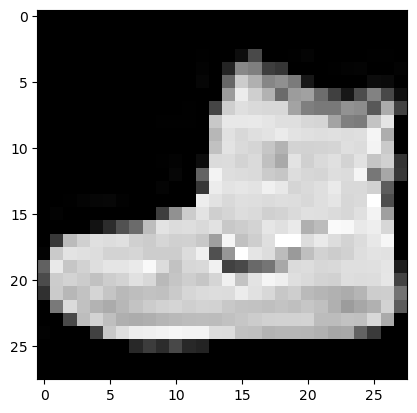

In [261]:
plt.imshow(image.squeeze(), cmap = 'gray')

In [262]:
# Pass image through model_2
model_2(image.unsqueeze(0).to(device))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [263]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.1 Stepping through nn.Conv2d()

See more about nn.Conv2d here: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [264]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}") 


Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [265]:
torch.manual_seed(42)
# Create a single cnv2d layer
conv_layer = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size=(3,3),
    stride=1,
    padding=0
)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191, -

In [266]:
conv_output.shape

torch.Size([1, 10, 62, 62])

### 7.2 Stepping through nn.Maxpool2d()

In [267]:
test_image.shape

torch.Size([3, 64, 64])

In [268]:
# Print out original image shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueeze dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.Maxpool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(0))
print(f"Shape after going through cpnv_layer(): {test_image_through_conv.shape}")

# Pass data through maxpool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through cov_layer() and maxpool_layer(): {test_image_through_conv_and_max_pool.shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueeze dimension: torch.Size([1, 3, 64, 64])
Shape after going through cpnv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through cov_layer() and maxpool_layer(): torch.Size([1, 10, 31, 31])


In [269]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n {random_tensor}")
print(f"random tensor shape {random_tensor.shape}")
# Create a maxpool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the maxpool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape {max_pool_tensor.shape}")



Random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
random tensor shape torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for model_2

In [270]:
# Setup loss function/ eval metrics / optimizer
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_2.parameters(), 
                            lr=0.1)

### 7.4 Training and testing model_2 using our training and testing functions

In [271]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# MEasure time
from timeit import default_timer as timer

train_time_start_model_2 = timer()

# Train and test model
epochs = 20
for epoch in tqdm(range(epochs)):

    print(f"Epoch: {epoch}\n______________")

    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model=model_2,
               data_loader=test_dataloader,
               loss_fn=loss_fn,           
               accuracy_fn=accuracy_fn,
               device=device)

train_time_end_model_2 = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0
______________
Train Loss:  0.59369 | Train acc: 78.41%


  5%|▌         | 1/20 [00:46<14:41, 46.41s/it]

Test Loss:  0.40801 | Train acc: 85.47%

Epoch: 1
______________
Train Loss:  0.35566 | Train acc: 87.18%


 10%|█         | 2/20 [01:24<12:31, 41.75s/it]

Test Loss:  0.35335 | Train acc: 87.01%

Epoch: 2
______________
Train Loss:  0.31687 | Train acc: 88.56%


 15%|█▌        | 3/20 [02:05<11:42, 41.31s/it]

Test Loss:  0.31447 | Train acc: 88.37%

Epoch: 3
______________
Train Loss:  0.29547 | Train acc: 89.27%


 20%|██        | 4/20 [02:50<11:23, 42.75s/it]

Test Loss:  0.31433 | Train acc: 88.64%

Epoch: 4
______________
Train Loss:  0.28168 | Train acc: 89.69%


 25%|██▌       | 5/20 [03:30<10:24, 41.65s/it]

Test Loss:  0.29224 | Train acc: 89.38%

Epoch: 5
______________
Train Loss:  0.26834 | Train acc: 90.30%


 30%|███       | 6/20 [04:11<09:39, 41.40s/it]

Test Loss:  0.29511 | Train acc: 89.14%

Epoch: 6
______________
Train Loss:  0.26122 | Train acc: 90.50%


 35%|███▌      | 7/20 [04:49<08:43, 40.29s/it]

Test Loss:  0.28326 | Train acc: 89.68%

Epoch: 7
______________
Train Loss:  0.25639 | Train acc: 90.60%


 40%|████      | 8/20 [05:26<07:50, 39.23s/it]

Test Loss:  0.29424 | Train acc: 89.71%

Epoch: 8
______________
Train Loss:  0.24952 | Train acc: 90.92%


 45%|████▌     | 9/20 [06:05<07:13, 39.39s/it]

Test Loss:  0.28356 | Train acc: 89.93%

Epoch: 9
______________
Train Loss:  0.24577 | Train acc: 91.07%


 50%|█████     | 10/20 [06:46<06:38, 39.89s/it]

Test Loss:  0.28835 | Train acc: 89.88%

Epoch: 10
______________
Train Loss:  0.24259 | Train acc: 91.10%


 55%|█████▌    | 11/20 [07:28<06:04, 40.53s/it]

Test Loss:  0.29950 | Train acc: 89.04%

Epoch: 11
______________
Train Loss:  0.23691 | Train acc: 91.48%


 60%|██████    | 12/20 [08:09<05:25, 40.64s/it]

Test Loss:  0.27640 | Train acc: 90.08%

Epoch: 12
______________
Train Loss:  0.23313 | Train acc: 91.51%


 65%|██████▌   | 13/20 [08:51<04:46, 40.96s/it]

Test Loss:  0.26398 | Train acc: 90.67%

Epoch: 13
______________
Train Loss:  0.23119 | Train acc: 91.71%


 70%|███████   | 14/20 [09:32<04:05, 40.84s/it]

Test Loss:  0.28215 | Train acc: 89.63%

Epoch: 14
______________
Train Loss:  0.23080 | Train acc: 91.56%


 75%|███████▌  | 15/20 [10:11<03:21, 40.39s/it]

Test Loss:  0.29636 | Train acc: 89.34%

Epoch: 15
______________
Train Loss:  0.22750 | Train acc: 91.66%


 80%|████████  | 16/20 [10:54<02:45, 41.34s/it]

Test Loss:  0.28389 | Train acc: 90.31%

Epoch: 16
______________
Train Loss:  0.22553 | Train acc: 91.91%


 85%|████████▌ | 17/20 [11:35<02:02, 40.96s/it]

Test Loss:  0.30155 | Train acc: 89.33%

Epoch: 17
______________
Train Loss:  0.22529 | Train acc: 91.68%


 90%|█████████ | 18/20 [12:13<01:20, 40.18s/it]

Test Loss:  0.29221 | Train acc: 89.42%

Epoch: 18
______________
Train Loss:  0.22445 | Train acc: 91.73%


 95%|█████████▌| 19/20 [12:53<00:40, 40.15s/it]

Test Loss:  0.27950 | Train acc: 89.71%

Epoch: 19
______________
Train Loss:  0.22255 | Train acc: 91.81%


100%|██████████| 20/20 [13:33<00:00, 40.68s/it]

Test Loss:  0.27616 | Train acc: 90.34%

Train time on cuda: 813.535 seconds


In [272]:
# Get model_2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device
)
print(model_2_results)

100%|██████████| 313/313 [00:04<00:00, 71.27it/s] 

tensor(0.2762, device='cuda:0') 90.33546325878594
{'model_name': 'FashionMNISTModelV2', 'model_loss': 0.27615734934806824, 'model_acc': 90.33546325878594}


In [273]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4766389727592468,
 'model_acc': 83.42651757188499}

## 8. Compare model results and training time 

In [274]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.276157,90.335463


In [275]:
# Add training time to results comparison 
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,101.555891
1,FashionMNISTModelV1,0.685001,75.019968,105.383740
2,FashionMNISTModelV2,0.276157,90.335463,813.534936


Text(0, 0.5, 'model')

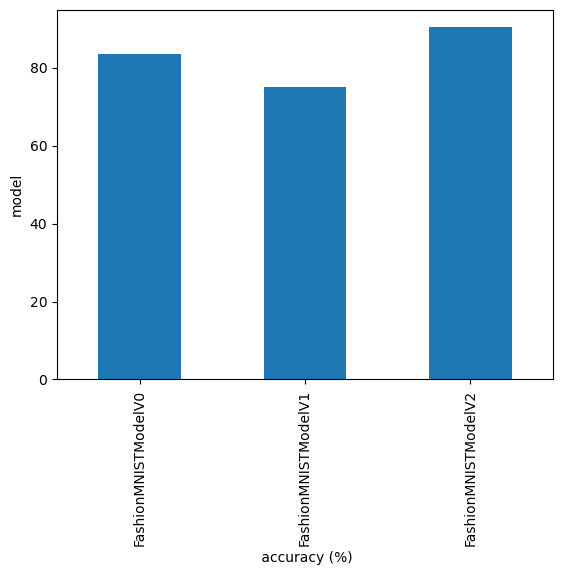

In [276]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="bar")
plt.xlabel(" accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [277]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare the samlple (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass (model outputs raw logits)
            pred_logit = model(sample)
            
            # Get prediction prbability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off the GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)




In [278]:
import random
#random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 16):
    test_samples.append(sample)
    test_labels.append(label)

# View the first sample shape
test_samples[0].shape



torch.Size([1, 28, 28])

Text(0.5, 1.0, 'T-shirt/top')

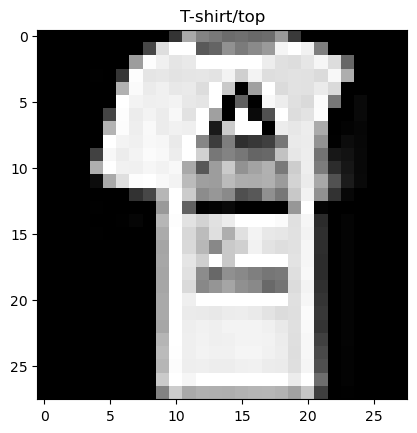

In [279]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [280]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples,
                              device=device)

# view first two prediction probabilities
pred_probs[:2]

tensor([[4.8210e-01, 1.3546e-06, 9.1819e-03, 4.7274e-01, 1.6159e-03, 5.4527e-09,
         3.4287e-02, 2.1384e-07, 6.7243e-05, 3.3339e-08],
        [3.0440e-05, 2.4074e-08, 3.2599e-04, 2.4462e-07, 9.2019e-01, 1.6907e-08,
         7.9450e-02, 1.2091e-09, 6.8986e-07, 8.8672e-08]])

In [281]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([0, 4, 3, 3, 5, 9, 1, 2, 9, 0, 3, 4, 3, 8, 0, 0])

In [282]:
test_labels

[0, 4, 3, 3, 5, 9, 1, 2, 9, 0, 3, 4, 3, 8, 0, 0]

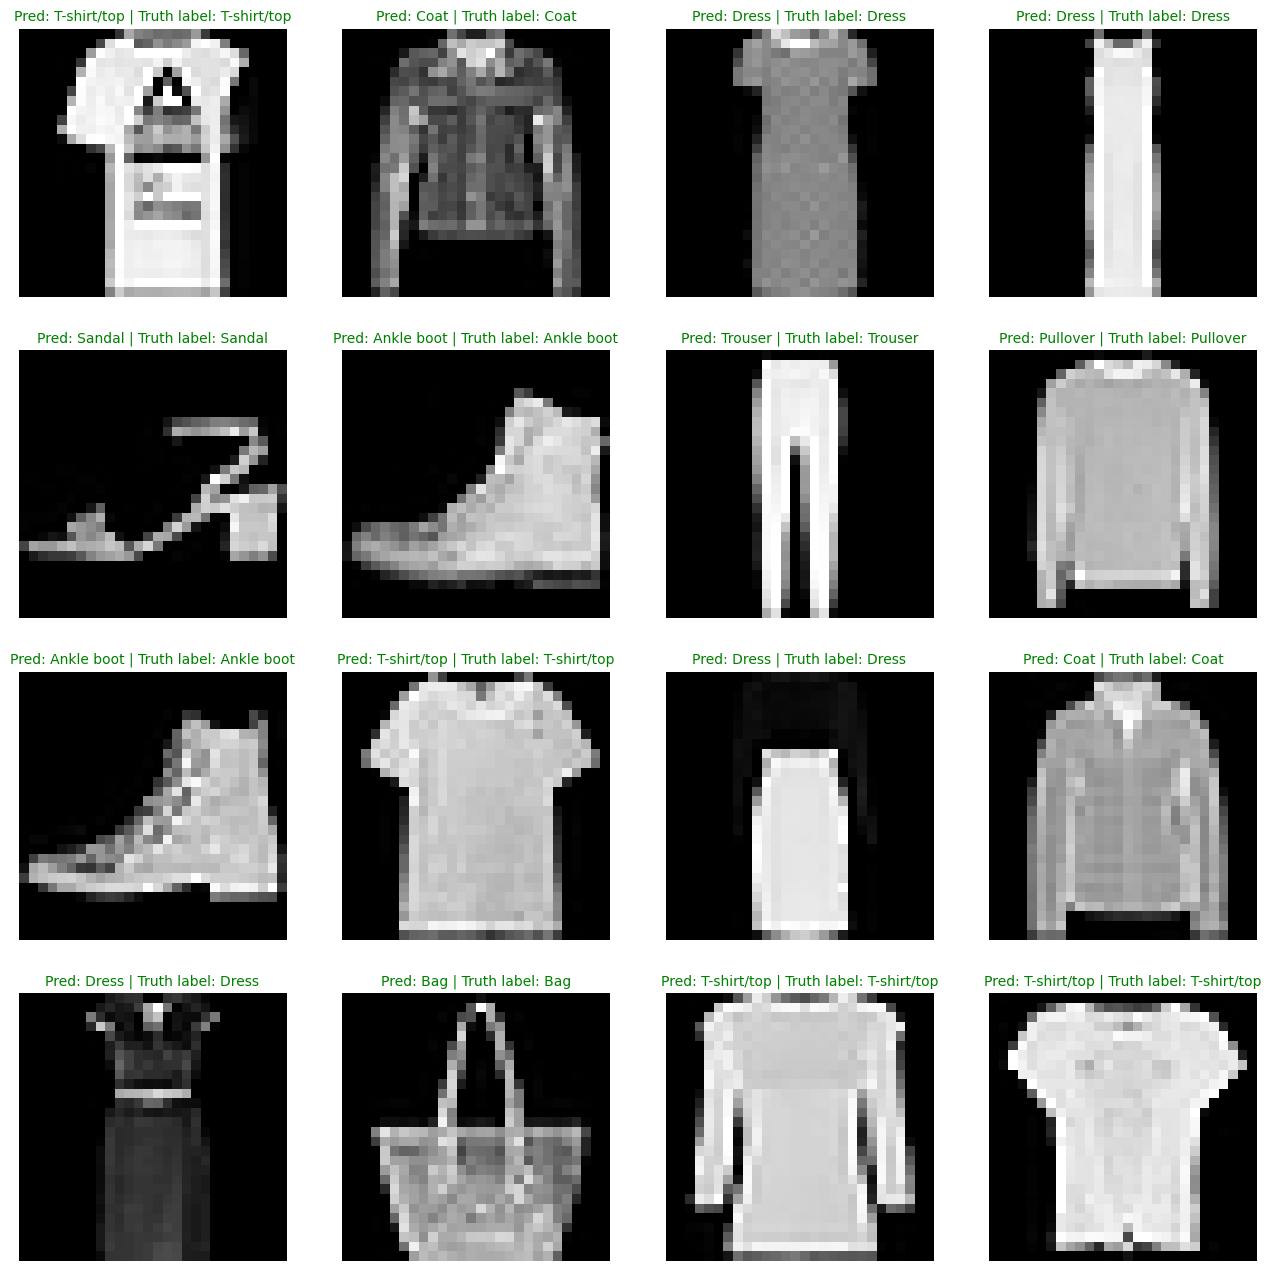

In [283]:
# Plot predictions 
plt.figure(figsize=(16,16))
nrows = 4
ncols = 4
for i, sample in enumerate(test_samples):
    # Create a subplot 
    plt.subplot(nrows, ncols, i + 1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction in text form e.g: "Sandal"
    pred_label = class_names[pred_classes[i]]

    # Get the truth label in text form
    truth_label = class_names[test_labels[i]]

    # Create a title of the image
    title_text = f"Pred: {pred_label} | Truth label: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize = 10, c="g") # green text if prediction same as truth

    else:
        plt.title(title_text, fontsize = 10, c="r") # red text if prediction not same as truth

    plt.axis(False)



## 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually: https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix 'torchmetrics.ConfusionMatrix'
3. Plot the confusion matrix using 'mlxtend.plotting.plot_confusion_matrix()'

In [284]:
from tqdm.auto import tqdm

# Make preditions with trained model
y_preds = []
y_truth = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc= "Making predictions"):
        # Send the data and target to target device
        X, y = X.to(device), y.to(device)

        # Do the forward pass
        y_logit = model_2(X)

        # Turn predictions from logits -> prediction probabilities -> prediction labels
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

        # Put predictions on cpu for evaluation
        y_preds.append(y_pred.cpu())
        y_truth.append(y.cpu())
        
        

# Concatentate list of predictions into a tensor
print(y_preds, len(y_preds), len(y_preds[0]))
y_pred_tensor = torch.cat(y_preds)
print(len(y_pred_tensor))
y_pred_tensor[:10]
y_truth = torch.cat(y_truth)

Making predictions: 100%|██████████| 313/313 [00:03<00:00, 92.35it/s] 


[tensor([9, 2, 1, 1, 6, 1, 2, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 5, 7, 5,
        1, 6, 6, 3, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1, 6, 6, 4, 6, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 3, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
        0, 6, 5, 3, 6, 7, 1, 6]), tensor([0, 1, 6, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 6, 5, 2, 8, 6, 7, 8,
        0, 0, 6, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 8, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 4, 4,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([7, 2, 3, 8, 0, 9, 4, 7, 8, 2, 8, 5, 6, 1, 2, 1, 3, 6, 9, 1, 0, 9, 3, 6,
        7, 9, 8, 4, 4, 7, 1, 6]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 3, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 4, 5, 4, 3, 2, 3, 8, 6, 4,
        3, 2, 7, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 2, 0, 6, 3, 8, 9, 6, 1, 6, 0, 2, 3, 0, 8, 3, 7, 2,
       

In [285]:
print(y_pred_tensor[:10])
print(test_data.targets[:10])
print(y_truth[:10])

tensor([9, 2, 1, 1, 6, 1, 2, 6, 5, 7])
tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])
tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])


In [286]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [287]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 2, 6, 5, 7])

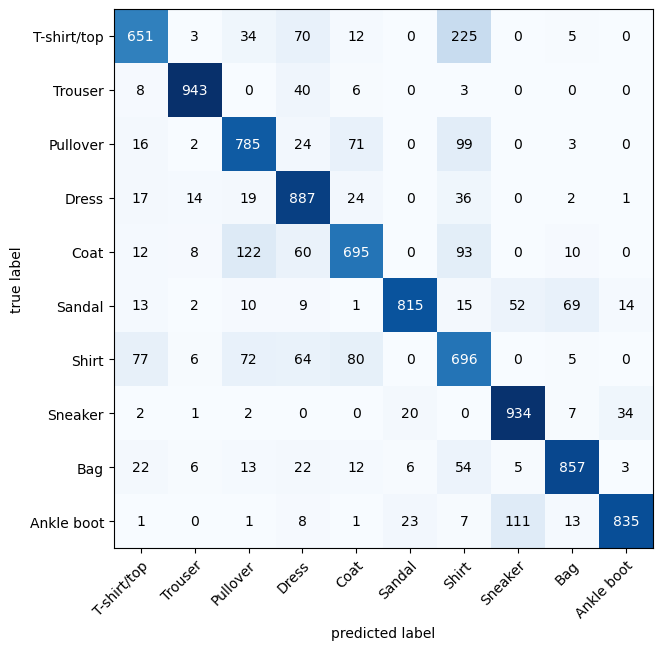

In [288]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),
                          task="multiclass")
confmat_tensor = confmat(preds= y_pred_tensor,
                          target = test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplot lib likes working with numpy
    class_names = class_names,
    figsize = (10,7)
)


## 11. Save and load best performing model

In [291]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [292]:
# Create a new instance of our model
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
)

# Load in the save dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [293]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.27615734934806824,
 'model_acc': 90.33546325878594}

In [294]:
# Evaluate the loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
loaded_model_2_results

100%|██████████| 313/313 [00:04<00:00, 75.95it/s] 

tensor(0.2762, device='cuda:0') 90.33546325878594


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.27615734934806824,
 'model_acc': 90.33546325878594}

In [296]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-2)

tensor(True)